## 1 Objetivo.
  
 - Neste notebook iremos explorar, analisar e preparar os dados para modelagem.
 - Por meio da análise exploratória dos dados, será possivel tirar algumas conclusões sobre o negócio em questão.

 - Importando as bibliotecas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

 - Importandos os dados do Studio.

In [2]:
url='https://raw.githubusercontent.com/robertferro/previsao_faturamento_studio_estetica/main/1%20-%20EDA/dados_modelagem.csv'

In [3]:
dados=pd.read_csv(url,sep=',')

In [4]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,...,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
0,2018-12-22,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,270.0,23,2018,12,sabado
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24,2018,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25,2018,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,560.0,26,2018,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,90.0,27,2018,12,quinta


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        740 non-null    object 
 1   design_de_sobrancelhas  740 non-null    float64
 2   design_coloracao        740 non-null    float64
 3   design_coloracao_buco   740 non-null    float64
 4   buco                    740 non-null    float64
 5   brown_lamination        740 non-null    float64
 6   micropigmentacao        740 non-null    float64
 7   extensao_de_cilios      740 non-null    float64
 8   lash_lifting            740 non-null    float64
 9   limpeza_de_pele         740 non-null    float64
 10  microagulhamento        740 non-null    float64
 11  peeling_quimico         740 non-null    float64
 12  massagem_relaxante      740 non-null    float64
 13  pacote_massagem_5       740 non-null    float64
 14  drenagem_linfatica      740 non-null    fl

In [7]:
dados['data_atendimento'] = pd.to_datetime(dados['data_atendimento'])

## 2. EDA

 - Visualizando a distribuição dos dados
 
 Faturamento X dia da semana.
 
 
 Identificar quais dias o fauramento e menor e maior.
 
 Quais procedimentos mais realizados
 
 Quais  procedimentos mais são realizados de acordo com períododo mês.
      
   

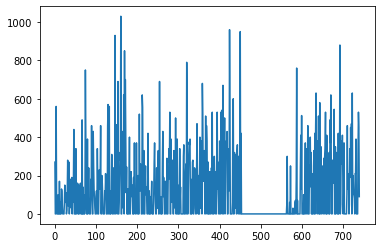

In [8]:
dados.faturamento.plot()

- Como pode ser observado acima existe um período de mais o menos 3 meses com faturamento igual a zero.


- Esse período corresponde ao tempo fechado por conta da pandemia.


- Vou excluir esses registros visto que o negócio só pode funcionar presencialmente e esses dias com faturamento zero vão alterar as visualizações e a análise, podendo trazer conclusões errôeneas sobre o negócio.

### Excluindo os dados referentes ao periodo da pandemia e aos dias de domingo.
 Pandemia: Durante o período de 20 de março a 1 de julho onegócio teve suas atividades suspensas, pois não podia funcionar presencialmente.

In [9]:
dados.loc[453:556]

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,...,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
453,2020-03-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20,2020,3,sexta
454,2020-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21,2020,3,sabado
455,2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,22,2020,3,domingo
456,2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23,2020,3,segunda
457,2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24,2020,3,terca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27,2020,6,sabado
553,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28,2020,6,domingo
554,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,29,2020,6,segunda
555,2020-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30,2020,6,terca


In [10]:
# Excluindo os registros selecionando apenas o intervalo entre os índices.

dados_pandemia =[]
for i in range(453,556):
    dados_pandemia.append(i)

dados = dados.drop(dados_pandemia)
dados = dados.reset_index()
dados = dados.drop('index', axis = 1)
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,...,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,dia,ano,mes,dia_da_semana
0,2018-12-22,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,270.0,23,2018,12,sabado
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24,2018,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25,2018,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,560.0,26,2018,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,90.0,27,2018,12,quinta


In [11]:
dados = dados.set_index('data_atendimento')

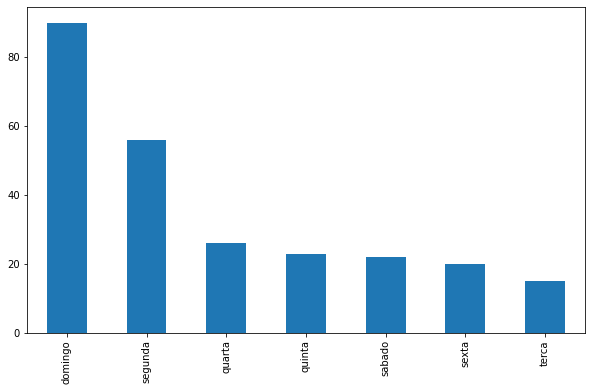

In [14]:
# Contabilizando os dias de negócioque tiveram faturamento zero.

dados[dados['qtde_clientes']==0].dia_da_semana.value_counts().plot(kind='bar',figsize=(10,6))

# sns.countplot(x='dia_da_semana',hue='qtde_clientes', data=dados[dados['faturamento']==0 ])

Pelo gráfico acima podemos  concluir que :
    
    Como domingo o negócio não funiona, dia de segunda-feira é o dia que mais tem registros sem clientes.

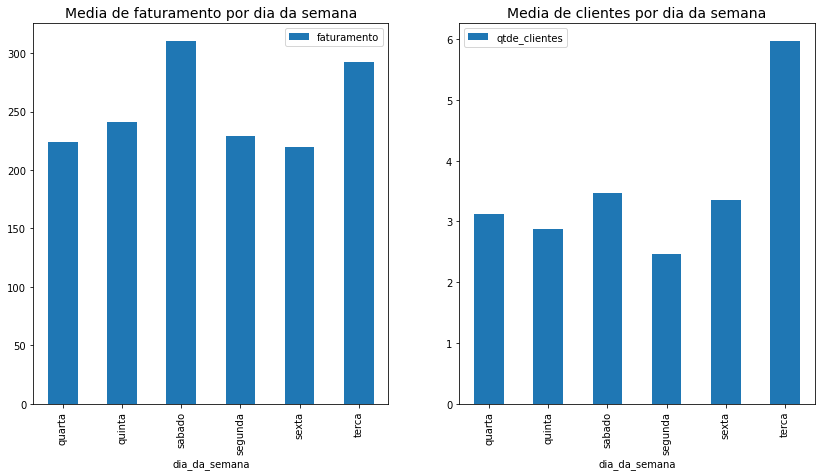

In [23]:
fig,ax= plt.subplots(1,2,figsize=(14,7))

dados[dados['faturamento']>0].groupby('dia_da_semana')[['dia_da_semana','faturamento']].mean().plot(kind='bar',ax=ax[0])
ax[0].set_title('Media de faturamento por dia da semana',fontsize=14)


dados[dados['faturamento']>0].groupby('dia_da_semana')[['dia_da_semana','qtde_clientes']].mean().plot(kind='bar',ax=ax[1])
ax[1].set_title('Media de clientes por dia da semana',fontsize=14)


plt.show()

In [31]:
dados.groupby('mes').mean().T

mes,1,2,3,4,5,6,7,8,9,10,11,12
design_de_sobrancelhas,0.370968,0.385965,0.22,0.133333,0.548387,0.166667,0.274194,0.451613,0.766667,0.629032,0.466667,0.873239
design_coloracao,0.112903,0.192982,0.24,0.266667,0.322581,0.433333,0.080645,0.403226,0.316667,0.435484,0.233333,0.436620
design_coloracao_buco,0.935484,1.000000,1.06,0.600000,0.677419,0.633333,0.516129,0.387097,0.550000,1.096774,0.900000,1.225352
buco,0.209677,0.192982,0.16,0.000000,0.322581,0.133333,0.161290,0.177419,0.416667,0.338710,0.216667,0.492958
brown_lamination,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000
micropigmentacao,0.016129,0.087719,0.00,0.033333,0.032258,0.233333,0.016129,0.020161,0.000000,0.027419,0.033333,0.028169
extensao_de_cilios,0.056452,0.122807,0.06,0.066667,0.032258,0.033333,0.000000,0.016129,0.016667,0.000000,0.050000,0.091549
lash_lifting,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.016129,0.150000,0.056452,0.066667,0.084507
limpeza_de_pele,0.564516,0.385965,0.47,0.633333,0.887097,0.500000,0.274194,0.370968,0.583333,0.419355,0.433333,0.464789
microagulhamento,0.000000,0.035088,0.02,0.000000,0.000000,0.000000,0.048387,0.064516,0.050000,0.048387,0.033333,0.000000


- Pelos gráficos acima pode-se concluir que :
  
  Sábado possui a maior média de faturamento.
  
  Terça possui a maior média de clientes.

In [ ]:
dados[dados['faturamento']>0 ].dia_da_semana.value_counts().plot(kind='bar',figsize=(12,6))

In [ ]:
sns.countplot(x='dia_da_semana',data=dados[dados['faturamento']>0 ])

In [ ]:
dados_por_mes = dados.drop(columns=['dia','mes','ano'],axis=1)

In [ ]:
dados_por_mes=dados.resample('M').sum()

In [ ]:
dados.resample('W').sum().faturamento.plot(kind='bar',figsize=(20,12))
plt.xticks(rotation=45)

In [ ]:
dados.columns

In [ ]:

sns.countplot(x='faturamento',data=dados.resample('W').sum())

In [ ]:

sns.countplot(x='dia_da_semana',data=dados[dados['faturamento']>500])

In [ ]:
#  quantidade de clientes por di a da semana
plt.figure(figsize=(15,6))
sns.countplot(x='dia_da_semana',hue='qtde_clientes', data=dados[dados['qtde_clientes']>0 ])
plt.legend(loc=1)

In [ ]:
sns.countplot(x='dia_da_semana',hue='qtde_clientes', data=dados[dados['design_coloracao']>0 ])

In [ ]:
dados.resample('W').sum()

In [ ]:
dados_por_mes

In [ ]:

dados.head()

 - Visualizando a distribuição do faturamento e de quantidade de clientes.

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
dados.faturamento.plot(kind="hist",ax=ax[0] )
ax[0].set_title('Faturamento')
dados.qtde_clientes.plot(kind="hist",ax=ax[1])
ax[1].set_title('Quantidade de Clientes')
plt.show()

 - Faturamento x Quantidade de clientes

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dados['qtde_clientes'], dados['faturamento'],alpha=0.5)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('qtde_clientes')
plt.ylabel('faturamento')

In [ ]:
sns.regplot('qtde_clientes','faturamento', data=dados)

 - Observando outliers.

In [ ]:
sns.boxplot(x=dados['faturamento'])

In [ ]:
sns.boxplot(x=dados['qtde_clientes'])

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dados['dia_da_semana'],dados['qtde_clientes'],alpha=0.5)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.ylabel('Quantidade de clientes')
plt.xlabel('Dia da semana')

In [ ]:
ax = sns.pairplot(data=dados,y_vars = 'qtde_clientes', x_vars = ['dia','mes','ano','faturamento'], hue = 'dia_da_semana')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=15 ,y=1.3)

 - Agrupando os dados por mês

In [ ]:
dados.index

In [ ]:
dados_por_mes = dados.drop(columns=['dia','mes','ano'],axis=1)

In [ ]:
dados = dados.set_index('data_atendimento')
dados_por_mes = dados.drop(columns=['dia','mes','ano'],axis=1)
# dados_por_mes=dados.resample('M', on='data_atendimento').sum()

In [ ]:
dados

In [ ]:
dados_por_mes.describe().T

In [ ]:
mes_ano=['dez_2018','jan_2019','fev_2019','mar_2019','abr_2019','maio_2019','jun_2019','jul_2019','ago_2019',
                      'set_2019','out_2019','nov_2019','dez_2019','jan_2020','fev_2020','mar_2020','abr_2020','maio_2020',
                       'jun_2020','jul_2020','ago_2020','set_2020','out_2020','nov_2020','dez_2020']
dados_por_mes['mes_ano']=mes_ano

In [ ]:
dados_por_mes.head()

In [ ]:
cols = dados_por_mes.columns.tolist()
cols = cols[-1:] + cols[:-1]
dados_por_mes = dados_por_mes[cols] 

In [ ]:
dados_por_mes.head()

 - Criando o DataFrame apenas com faturamento e quantidade de clientes por mês

In [ ]:
fat_mensal=dados_por_mes.loc[:,['mes_ano','faturamento','qtde_clientes']]
fat_mensal=fat_mensal.set_index('mes_ano')

 ### Visualizando faturamento mensal e quantidade de clientes por mês.

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
fat_mensal.faturamento.plot.bar(ax=ax[0])
ax[0].set_title('Faturamento Mensal')
fat_mensal.qtde_clientes.plot.bar(ax=ax[1],color='g')
ax[1].set_title('Quantidade de clientes por mês')
plt.xticks();

 - Criando um arquvo CSV que pronto para modelagem.

In [ ]:
dados.to_csv('dados_modelagem.csv', index=False)

In [ ]:
pd.read_csv('dados_modelagem.csv').head()